# STAT2005 Computer Simulation - Workshop 3

## Simulating normal distribution using Cauchy distribution

This workshop will demonstrate how to simulate a normal random variable using the Cauchy distribution as the proposal. It first uses the inversion method to simulate a Cauchy random variable, which can then be used as the proposal to simulate normal random variable by the accept-reject algorithm. 

The idea here is to demonstrate the fact that these techniques are often used together to simulate different random variables rather than being used in isolation. 

### Task 1: Simulate the Cauchy random variable 

<div style="background-color:rgb(255,200,200)">
The Cauchy distribution with parameter $\alpha$ has PDF

$$ f(x) = \frac{\alpha}{\pi (\alpha^2+x^2)} \qquad x\in \mathbb{R}.$$

Show that the CDF of Cauchy is 

$$F(x) = \frac{1}{\pi} \arctan \frac{x}{\alpha} + \frac{1}{2}.$$

**Hint** Recall 

$$ \int \frac{1}{a^2+x^2} dx = \frac{1}{a}\arctan \frac{x}{a} + c$$

where $c$ is some arbitrary constant and $y=\arctan(x) \equiv x=\tan (y)$. 
</div>

**Solution**

By definition, the CDF is 

$$\begin{align} 
    F(x) =& \int^x_{-\infty} f(s) ds \\
    =& \frac{\alpha}{\pi}  \int^x_{-\infty}\frac{1}{\alpha^2+s^2} ds \\
    =& \frac{\alpha}{\pi} \left [ \frac{1}{\alpha} \arctan \frac{s}{\alpha} \right ]^x_{-\infty} \\
    =& \frac{1}{\pi} \arctan \frac{x}{\alpha} + \frac{1}{2}.
    \end{align} 
$$
The last step followed by the fact that $\tan y \rightarrow -\infty$ as $y\rightarrow -\pi/2$. 

Simulate the Cauchy random variable using the inversion method. 

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize']=[12,9]

**Solution**

Note that 

$$u = \frac{1}{\pi} \arctan \frac{x}{\alpha} + \frac{1}{2}$$

then 

$$x = \alpha \tan \left [ \pi \left (u-\frac{1}{2}\right ) \right ].$$

In [50]:
def RV_cauchy(N, a): 
    """
    Generate N draws from the Cauchy distribution with the parameter a.
    Inputs:
        N: Positive int. The number of draws.
        a: Positive scalar. The parameter of the Cauchy distribution. 
    Output:
        x: (N,) numpy array. 
    """
    
    if (N<0)|(type(N)!=int):
        print('The number of draws must be a positive integer.')
    elif (a<=0):
        print('The parameter must be a positive number.')
    else:
        u = sps.uniform.rvs(0.01,0.98,size=N)
        x = a*np.tan(np.pi*(u-0.5))
    return x
        

In [51]:
def PDF_cauchy(x,a):
    """
    PDF of the Cauchy Distribution. 
    Inputs:
        x: float. The point in which to evaluate the PDF.
        a: positive float. The parameter of the Cauchy distribuion. 
    Output:
        y: Positive float. 
    """
    if (a<=0):
        print('The parameter must be a positive number.')
    else: 
        return a/(np.pi*(np.power(a,2)+np.power(x,2)))

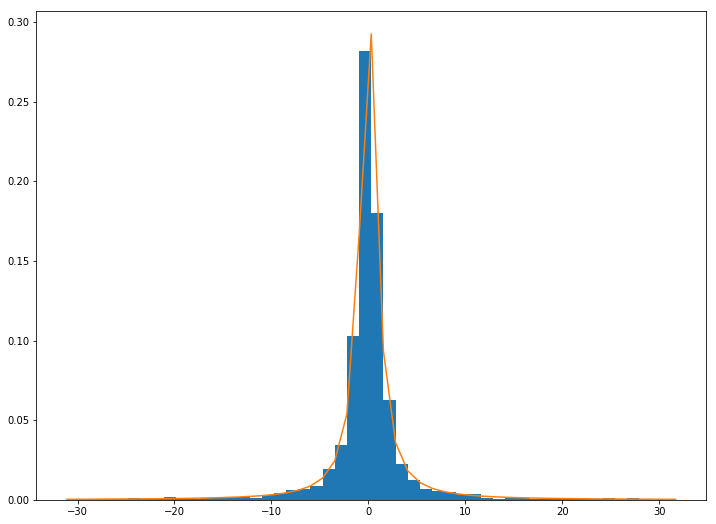

In [52]:
N,a = 5000,1
xCauchy = RV_cauchy(N,a)
hist = plt.hist(xCauchy, bins=50, normed=1)
plt.plot(hist[1], PDF_cauchy(hist[1],a))

Note that the method becomes a little unstable when $u=0$ and $u=1$. Why? 

### Task 2: Find the minimum rejection rate

<div style="background-color:rgb(255,200,200)">
Let $c$ be a positive real number such that $cf(x;\alpha) \geq \phi(x)$ where $\phi(x)$ denotes the PDF of the standard normal distribution. Show that 

$$c \geq \begin{cases} \alpha \sqrt{\frac{\pi}{2}} \quad& \text{if } \alpha \geq \sqrt{2} \\ \frac{\sqrt{2\pi}}{\alpha} \exp \left (\frac{\alpha^2-2}{2} \right ) \quad& \text{if } \alpha < \sqrt{2}. \end{cases} $$  
</div>

**Solution**

Let $h(x) = \phi(x)/f(x)$ then we are seeking $c$ such that $c\geq h(x)$ for all $x$. Note that 
$$ h(x) = \sqrt{\frac{\pi}{2}} \frac{x^2+\alpha^2}{\alpha} \exp \left (-\frac{x^2}{2} \right ).$$
Therefore, we are seeking the maximum point of $h(x)$, $x_\max$. Differentiate $h(x)$ and set it to 0 gives:
$$\sqrt{\frac{\pi}{2}} \frac{\phi(x)}{\alpha} \left ( 2-\alpha^2-x^2 \right )x = 0$$
and therefore 
$$ x_\max = 0 \quad \text{ or } \quad  x_\max = \pm \sqrt{2-\alpha^2}.$$

The second derivative of $h(x)$ is 

$$\frac{d^2h}{dx^2} = \sqrt{\frac{\pi}{2}} \frac{\phi(x)}{\alpha} \left [ x^4+(\alpha^2-5)x^2+2-\alpha^2 \right ].$$

After some straightforward algebra, we can show that 
$$ \frac{d^2h}{dx^2} \bigg \vert_{x=0} < 0$$
if $\alpha \geq \sqrt{2}$ and  
$$ \frac{d^2h}{dx^2} \bigg \vert_{x=\pm\sqrt{2-\alpha^2}} < 0$$
if $\alpha < \sqrt{2}.$

Substitute the corresponding $x_\max$ into $h(x)$ gives the result. 

<div style="background-color:rgb(255,200,200)">
Show that $\alpha=1$ gives the minimum $c$. 
</div>

**Solution** 

For $\alpha \geq \sqrt{2}$, the lowest possible $c$ is clearly $\sqrt{\pi}$. Now for $\alpha < \sqrt{2}$, 
$$h(x_\max) = \frac{\sqrt{2\pi}}{\alpha} \exp \left ( \frac{\alpha^2-2}{2} \right ).$$
Differentiate $h(x_\max)$ with respect to $\alpha$ and set the derivative to 0 gives $\alpha=1$. Hence $c=\sqrt{2\pi} \exp(-0.5) < \sqrt{\pi}$. 

### Task 3: Implement the Accept-reject algorithm 

<div style="background-color:rgb(255,200,200)">
    The result above suggests that we should choose the Cauchy distribution with $\alpha=1$ and $c=\sqrt{2\pi} \exp(-0.5)$ because this gives the minimum rejection rate. 

Implement an Accept-reject algorithm to simulate a standard normal random variable using this Cauchy distribution as the proposal. 
</div>

**Solution**
First we show that the proposal with the choice of $c$ does provide an valid envelop. 

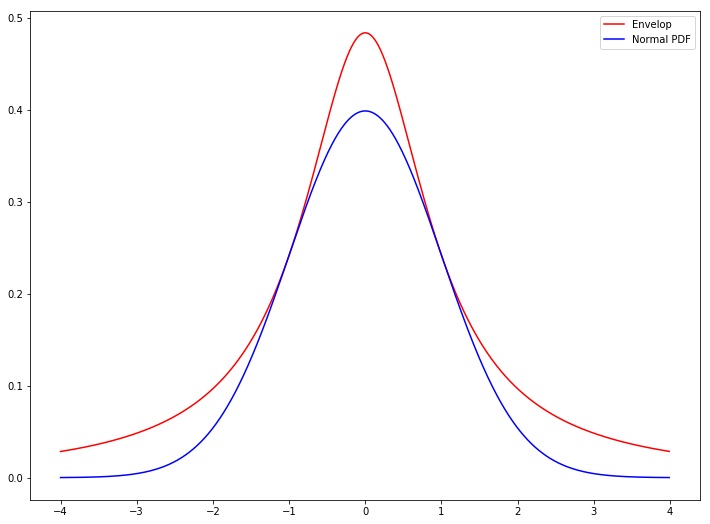

In [56]:
xset,a,c = np.arange(-4,4,0.01),1,np.power(2*np.pi,0.5)*np.exp(-0.5)
envelop = c*PDF_cauchy(xset,a)
plt.plot(xset,envelop, 'r', xset,sps.norm.pdf(xset),'b')
plt.legend(['Envelop', 'Normal PDF'])

Note that the envelop seems to work. Now the implementation of the Accept-reject.

In [61]:
def AR_normal_cauchy(N):
    """
    Implement the Accept-reject algorithm to gereate N random draw for a standard normal using Cauchy distribution with alpha =1.
    Input:
        N: positive int. The number of random draws.
    Output:
        x: (N,) numpy array. 
    
    """
    c = np.power(2*np.pi,0.5)*np.exp(-0.5)
    success = 0
    x = np.zeros(N)
    while success<N:
        xcand = RV_cauchy(1,1)
        u = sps.uniform.rvs(0,c*PDF_cauchy(xcand,1), size=1)
        if u<sps.norm.pdf(xcand):
            x[success] = xcand
            success = success + 1
    return x

In [64]:
N=5000
x = AR_normal_cauchy(N)

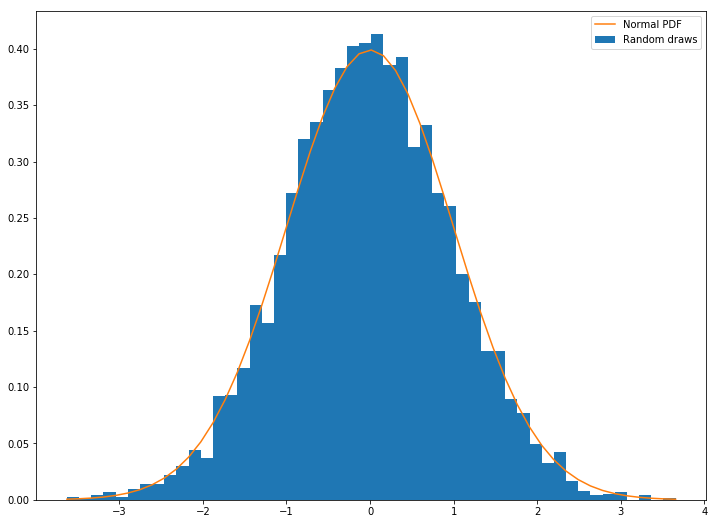

In [66]:
hist = plt.hist(x,bins=50,normed=1)
plt.plot(hist[1], sps.norm.pdf(hist[1]))
plt.legend(['Normal PDF', 'Random draws'])